In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-09-24 20:12:38.049792: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-24 20:12:38.088925: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-24 20:12:38.646009: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Coletando dados 


df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Pleuronectiformes/Desagregações - RJ_Reconstrucao_Pleuronectiformes_2024_08_20.xlsx')
df_Linguado_areia_art = pd.DataFrame(df[['Ano','Linguado_areia_art']])

dados = df_Linguado_areia_art.dropna()
anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1990,1991,1992,1993,1994,2016])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

pesca = dados['Linguado_areia_art'].values
dados.head()

,Ano,Linguado_areia_art
26,1976,34.663197
27,1977,240.766846
28,1978,312.828075
29,1979,23.856927
30,1980,30.044847


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

pesca_mean = np.mean(pesca)
pesca_std = np.std(pesca)
pesca_norm = (pesca - pesca_mean)/pesca_std

In [4]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,pesca_norm, epochs=80, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Pleuronectiformes/Linguado_areia/pesos pesca art/.weights.h5', overwrite=True)

Epoch 1/80


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.0958  
Epoch 2/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6815 
Epoch 3/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0074 
Epoch 4/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8427 
Epoch 5/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9240 
Epoch 6/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5686 
Epoch 7/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8494 
Epoch 8/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8455 
Epoch 9/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7566 
Epoch 10/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8240 
Epoch 11/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8105 
Epoch 12/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8030 
Epoch 13/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6525 
Epoch 14/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7991 
Epoch 15/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6580 
Epoch 16/80
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [5]:
#Pegando os pesos salvos
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Pleuronectiformes/Linguado_areia/pesos pesca art/.weights.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[248.11133  ]
 [242.76326  ]
 [237.41595  ]
 [232.06589  ]
 [226.70938  ]
 [221.33728  ]
 [215.9602   ]
 [210.57458  ]
 [205.18524  ]
 [199.79631  ]
 [194.39644  ]
 [188.98912  ]
 [183.58221  ]
 [178.09378  ]
 [172.60464  ]
 [167.0912   ]
 [161.57565  ]
 [156.06065  ]
 [150.57416  ]
 [145.0994   ]
 [139.63286  ]
 [134.13121  ]
 [128.57155  ]
 [122.983215 ]
 [117.37657  ]
 [111.75169  ]
 [ 29.827244 ]
 [ 27.005083 ]
 [ 24.528913 ]
 [ 22.36133  ]
 [ 20.534073 ]
 [  1.2300701]]


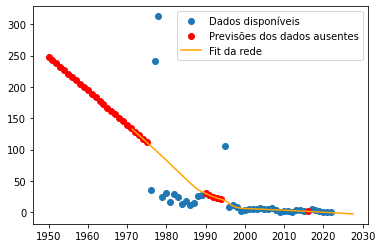

In [6]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*pesca_std + pesca_mean
prev_ausentes = model.predict(anos_para_prever_norm)*pesca_std + pesca_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pesca_std + pesca_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

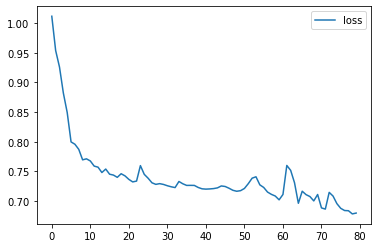

In [7]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [8]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*pesca_std + pesca_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0


df_preenchido = pd.DataFrame({'Ano':anos, 'Linguado_areia_art':prev_continua.flatten()})


df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Pleuronectiformes/Linguado_areia/Interpolações e Extrapolações Linguado_areia_art.xlsx')

df_preenchido

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Ano,Linguado_areia_art
0,1950,248.111328
1,1951,242.763260
2,1952,237.415955
3,1953,232.065887
4,1954,226.709381
...,...,...
62,2012,2.528872
63,2013,2.192329
64,2014,1.863543
65,2015,1.552458
